# Efficiency test of a Multi-layer Perceptron

## Import libraries

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model, layers, Sequential, optimizers

import numpy as np

import time

import matplotlib.pyplot as plt
%matplotlib inline

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Useful variables and functions

In [2]:
# MNIST dataset parameters
num_classes = 10 # total classes (0-9 digits)
num_features = 784 # data features (img shape: 28*28)
num_epochs = 100 # no. epochs


# Network parameters
n_hidden_1 = 128 # 1st layer's no. neurons
n_hidden_2 = 256 # 2nd layer's no. neurons

In [3]:
# Function that plots figures based on the history of the training
def loss_acc_plot(history):
    plt.figure()
    plt.plot(history.history['accuracy'], label = 'Train')
    plt.plot(history.history['val_accuracy'], label = 'Validation')
    plt.legend()
    plt.title('Accuracy of train and validation sets')

    plt.figure()
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.legend()
    plt.title('Loss of train and validation sets')

    plt.show()

## Preprocessing of data

In [4]:
# Preparation of MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

## 1st Model - Variable batch size

In [18]:
model_1 = Sequential([
    layers.Flatten(input_shape=(28 * 28, )),
    layers.Dense(n_hidden_1, activation='relu'),
    layers.Dense(n_hidden_2, activation='relu'),
    layers.Dense(10)
])

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


Batch size = 1

Epoch 1/100
48000/48000 [==============================] - 259s 5ms/step - loss: 0.5364 - accuracy: 0.9235 - val_loss: 0.4823 - val_accuracy: 0.9534
Epoch 2/100
48000/48000 [==============================] - 261s 5ms/step - loss: 0.5332 - accuracy: 0.9529 - val_loss: 0.5788 - val_accuracy: 0.9506
Epoch 3/100
48000/48000 [==============================] - 262s 5ms/step - loss: 0.5179 - accuracy: 0.9608 - val_loss: 0.6254 - val_accuracy: 0.9579
Epoch 4/100
48000/48000 [==============================] - 229s 5ms/step - loss: 0.5125 - accuracy: 0.9649 - val_loss: 0.5903 - val_accuracy: 0.9632
Epoch 5/100
48000/48000 [==============================] - 89s 2ms/step - loss: 0.4864 - accuracy: 0.9688 - val_loss: 0.7078 - val_accuracy: 0.9584
Epoch 6/100
48000/48000 [==============================] - 89s 2ms/step - loss: 0.4770 - accuracy: 0.9718 - val_loss: 0.6577 - val_accuracy: 0.9662
Epoch 7/100
48000/48000 [==============================] - 89s 2ms/step - loss: 0.4614 - accuracy: 0.9731 - 

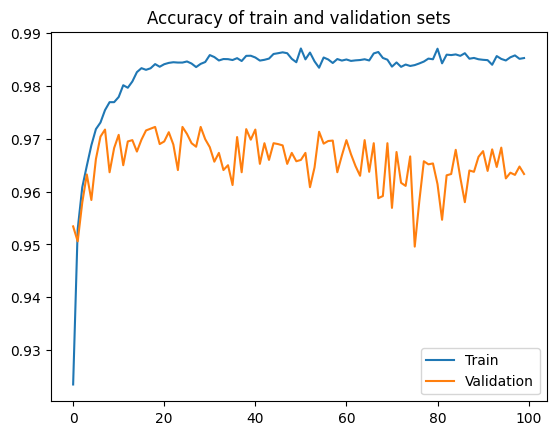

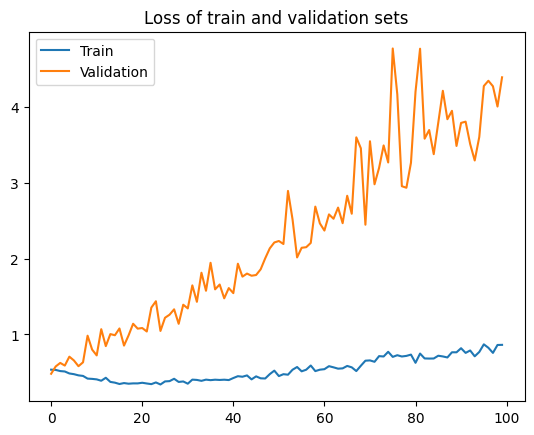

Training time: 11985.89471077919 seconds


In [19]:
# Compile model
# Note that SparseCategoricalCrossentropy loss fucntion applies softmax to the output layer
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

st = time.time()

history = model_1.fit(x_train, y_train, batch_size=1, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

Batch size = 256

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8849 - val_loss: 0.2025 - val_accuracy: 0.9423
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9502 - val_loss: 0.1338 - val_accuracy: 0.9610
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 0.1147 - accuracy: 0.9660 - val_loss: 0.1114 - val_accuracy: 0.9671
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0868 - accuracy: 0.9732 - val_loss: 0.1101 - val_accuracy: 0.9668
Epoch 5/100
188/188 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9787 - val_loss: 0.1172 - val_accuracy: 0.9646
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9834 - val_loss: 0.0987 - val_accuracy: 0.9707
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9863 - val_loss: 0.0890 - val_accuracy: 0.9736

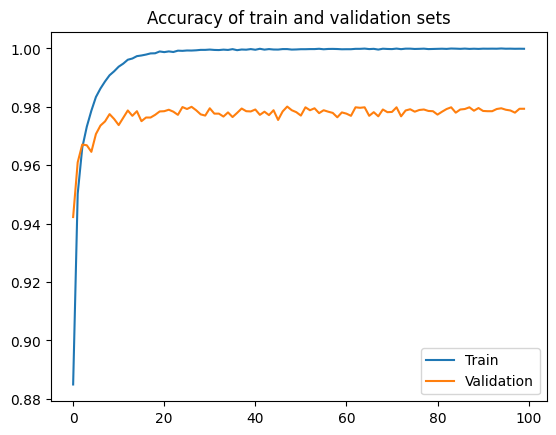

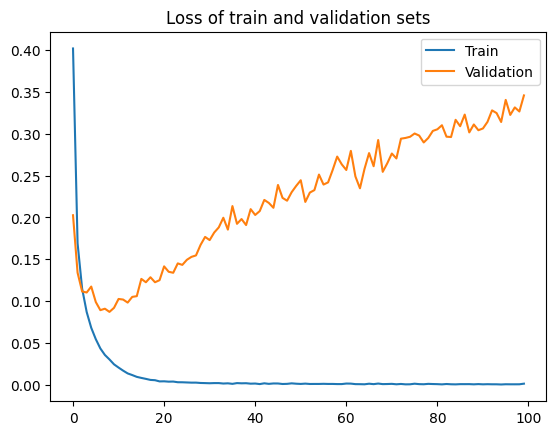

Training time: 47.914323806762695 seconds


In [20]:
# Set the model with random new weights
model_1 = Sequential([
    layers.Flatten(input_shape=(28 * 28, )),
    layers.Dense(n_hidden_1, activation='relu'),
    layers.Dense(n_hidden_2, activation='relu'),
    layers.Dense(10)
])

# Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

st = time.time()

history = model_1.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

Batch size = Train size

Epoch 1/100
1/1 [==============================] - 1s 633ms/step - loss: 2.2886 - accuracy: 0.1138 - val_loss: 1.9597 - val_accuracy: 0.5650
Epoch 2/100
1/1 [==============================] - 0s 109ms/step - loss: 1.9668 - accuracy: 0.5553 - val_loss: 1.6268 - val_accuracy: 0.7217
Epoch 3/100
1/1 [==============================] - 0s 116ms/step - loss: 1.6384 - accuracy: 0.7101 - val_loss: 1.3164 - val_accuracy: 0.7632
Epoch 4/100
1/1 [==============================] - 0s 111ms/step - loss: 1.3346 - accuracy: 0.7527 - val_loss: 1.2267 - val_accuracy: 0.6719
Epoch 5/100
1/1 [==============================] - 0s 108ms/step - loss: 1.2494 - accuracy: 0.6564 - val_loss: 1.1369 - val_accuracy: 0.6727
Epoch 6/100
1/1 [==============================] - 0s 131ms/step - loss: 1.1691 - accuracy: 0.6555 - val_loss: 0.9830 - val_accuracy: 0.7106
Epoch 7/100
1/1 [==============================] - 0s 148ms/step - loss: 1.0102 - accuracy: 0.7013 - val_loss: 0.9092 - val_accuracy: 0.7442
Epoch 8/100
1

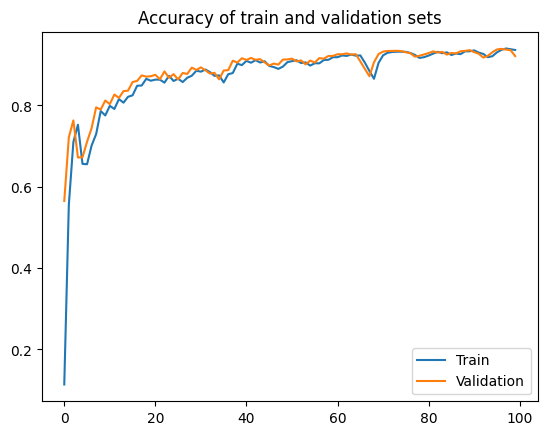

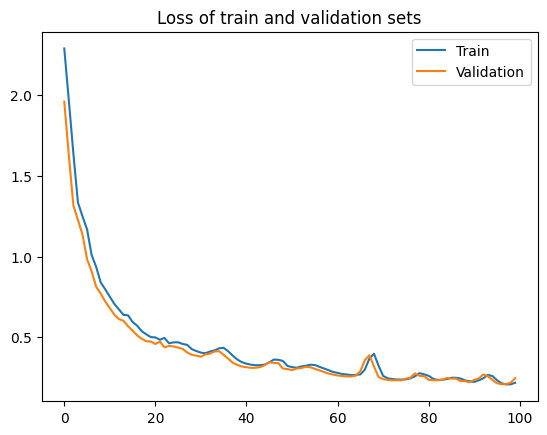

Training time: 12.109253406524658 seconds


In [21]:
# Set the model with random new weights
model_1 = Sequential([
    layers.Flatten(input_shape=(28 * 28, )),
    layers.Dense(n_hidden_1, activation='relu'),
    layers.Dense(n_hidden_2, activation='relu'),
    layers.Dense(10)
])

# Compile model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

st = time.time()

# The train size is the 80% of the total train set because 20% is the validation
n_train = int(np.shape(y_train)[0]*0.8)
history = model_1.fit(x_train, y_train, batch_size=n_train, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

## 2nd Model - RMSprop optimizer with multiple Rho values

Learning rate = 0.001,
Rho = 0.01

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 0.4705 - accuracy: 0.8678 - val_loss: 0.2233 - val_accuracy: 0.9358
Epoch 2/100
188/188 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9403 - val_loss: 0.1593 - val_accuracy: 0.9528
Epoch 3/100
188/188 [==============================] - 0s 3ms/step - loss: 0.1458 - accuracy: 0.9567 - val_loss: 0.1442 - val_accuracy: 0.9572
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9655 - val_loss: 0.1343 - val_accuracy: 0.9606
Epoch 5/100
188/188 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9715 - val_loss: 0.1274 - val_accuracy: 0.9660
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9755 - val_loss: 0.1204 - val_accuracy: 0.9688
Epoch 7/100
188/188 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9780 - val_loss: 0.1246 - val_accuracy: 0.9708

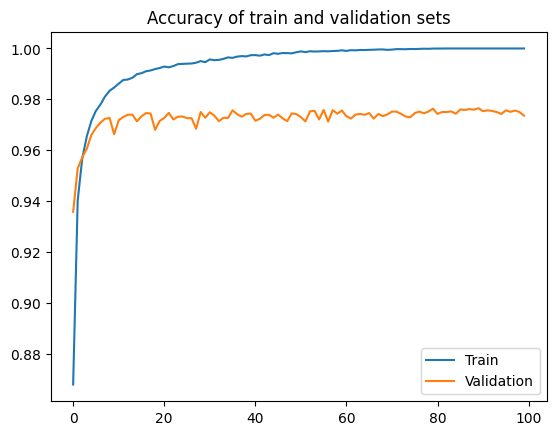

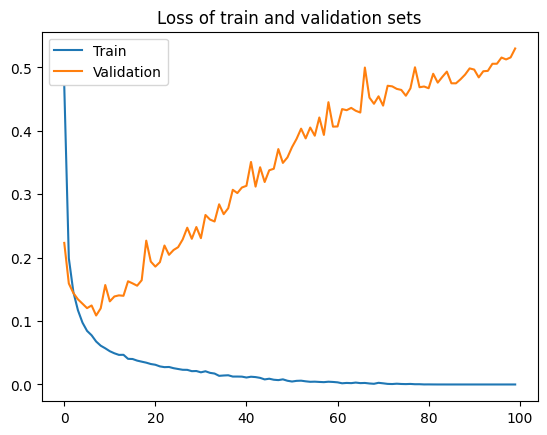

Training time: 48.145010471343994 seconds


In [22]:
# Set the model with random new weights
model_1 = Sequential([
    layers.Flatten(input_shape=(28 * 28, )),
    layers.Dense(n_hidden_1, activation='relu'),
    layers.Dense(n_hidden_2, activation='relu'),
    layers.Dense(10)
])

# Set optimizer
opt = optimizers.RMSprop(learning_rate=0.001, rho=0.01)

# Compile model
model_1.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

st = time.time()

history = model_1.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

Learning rate = 0.001,
Rho = 0.99

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3244 - accuracy: 0.9019 - val_loss: 0.1785 - val_accuracy: 0.9460
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9601 - val_loss: 0.1177 - val_accuracy: 0.9645
Epoch 3/100
188/188 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9717 - val_loss: 0.1170 - val_accuracy: 0.9632
Epoch 4/100
188/188 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9773 - val_loss: 0.0993 - val_accuracy: 0.9711
Epoch 5/100
188/188 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.0968 - val_accuracy: 0.9716
Epoch 6/100
188/188 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9864 - val_loss: 0.0876 - val_accuracy: 0.9759
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.0878 - val_accuracy: 0.9746

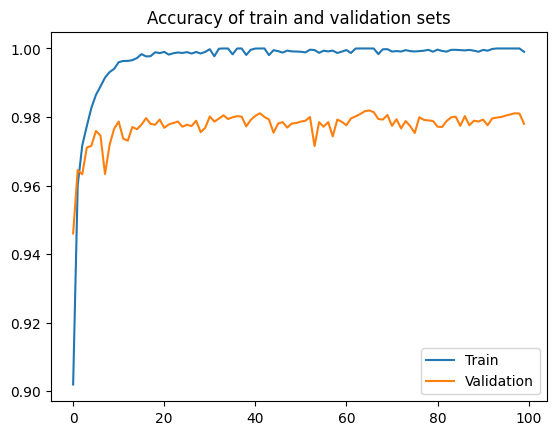

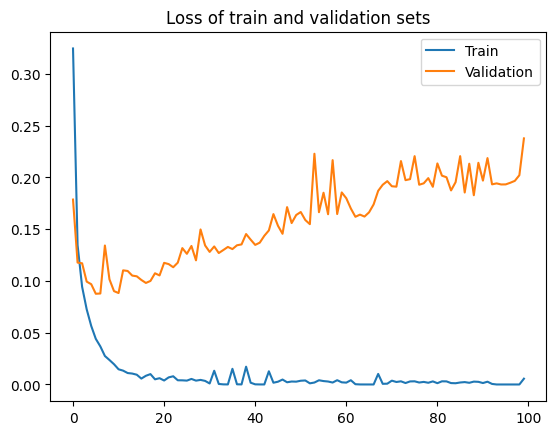

Training time: 48.19925856590271 seconds


In [23]:
# Set the model with random new weights
model_1 = Sequential([
    layers.Flatten(input_shape=(28 * 28, )),
    layers.Dense(n_hidden_1, activation='relu'),
    layers.Dense(n_hidden_2, activation='relu'),
    layers.Dense(10)
])

# Set optimizer
opt = optimizers.RMSprop(learning_rate=0.001, rho=0.99)

# Compile model
model_1.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

st = time.time()

history = model_1.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

## 3rd Model with initialization of weights

### Weight initialization with random normal distribution

In [24]:
# Set weight initializer
initial = tf.keras.initializers.RandomNormal(mean=10)

model_2 = Sequential([
    layers.Flatten(input_shape=(28 * 28, )),
    layers.Dense(n_hidden_1, activation='relu', kernel_initializer=initial),
    layers.Dense(n_hidden_2, activation='relu', kernel_initializer=initial),
    layers.Dense(10, kernel_initializer=initial)
])

model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 3607921152.0000 - accuracy: 0.1137 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 2.3019 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 2.3016 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accurac

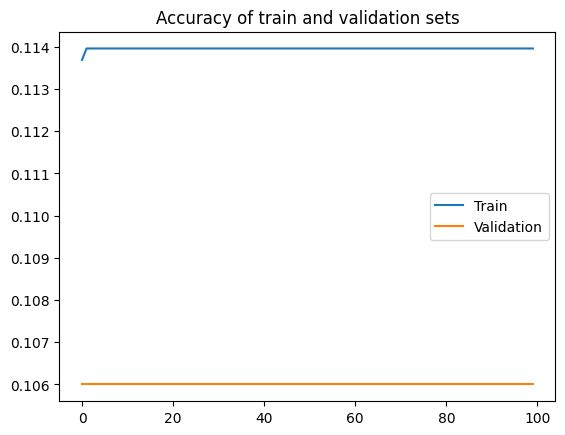

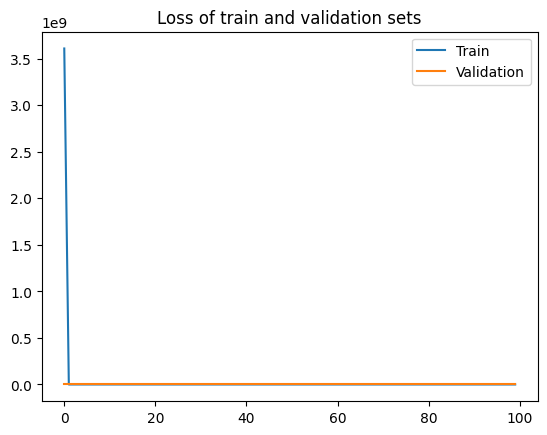

Training time: 42.6448290348053 seconds


In [25]:
# Set optimizer
opt = optimizers.SGD(learning_rate=0.01)

# Compile model
model_2.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

st = time.time()

history = model_2.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

## 4th Model with L2 regularization

### Initializing weights with normal distribution

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dense_26 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 4s 16ms/step - loss: 1489835393024.0000 - accuracy: 0.1136 - val_loss: 1009062903808.0000 - val_accuracy: 0.1060
Epoch 2/100


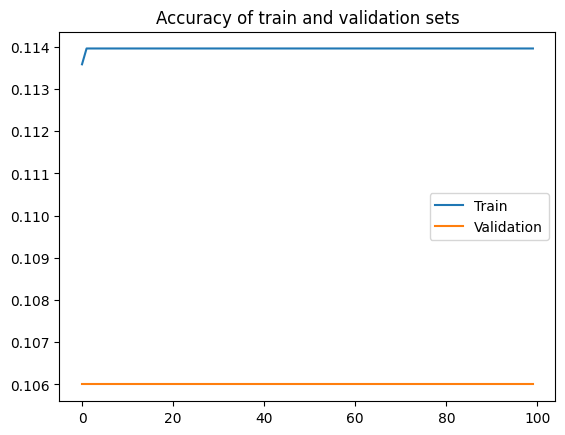

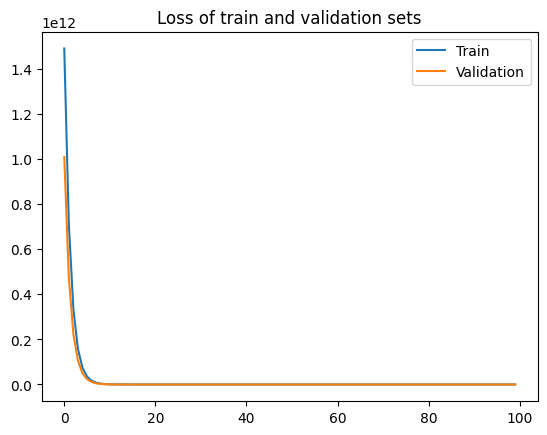

Training time: 107.44474530220032 seconds
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               100480    
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                                 
 dense_29 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 275483230208.0000 - accuracy: 0.1135 - val_loss: 264712994816.0

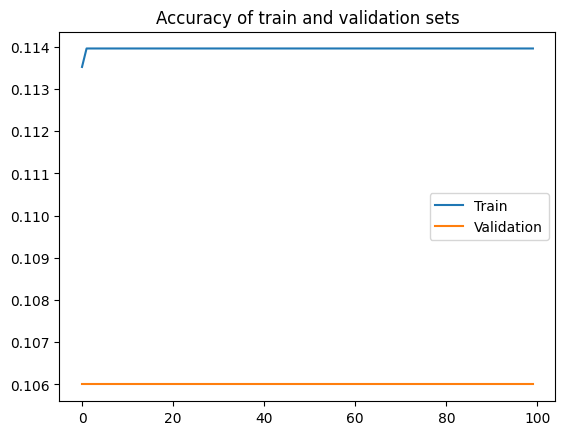

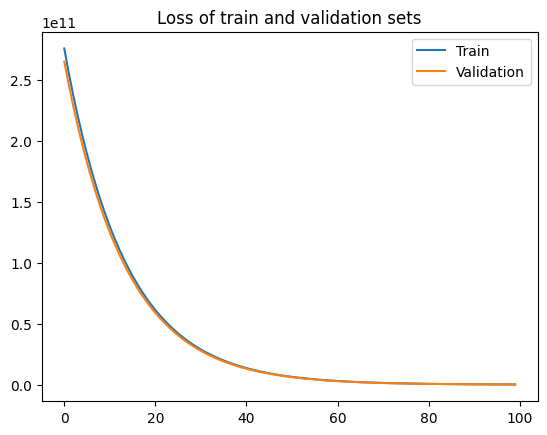

Training time: 44.67177677154541 seconds
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               100480    
                                                                 
 dense_31 (Dense)            (None, 256)               33024     
                                                                 
 dense_32 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: 18166005760.0000 - accuracy: 0.1135 - val_loss: 15599998976.000

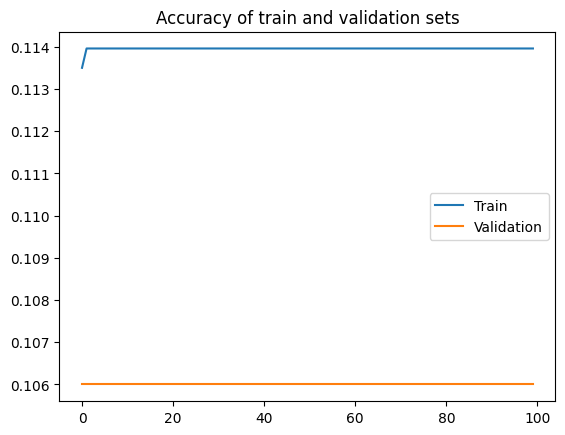

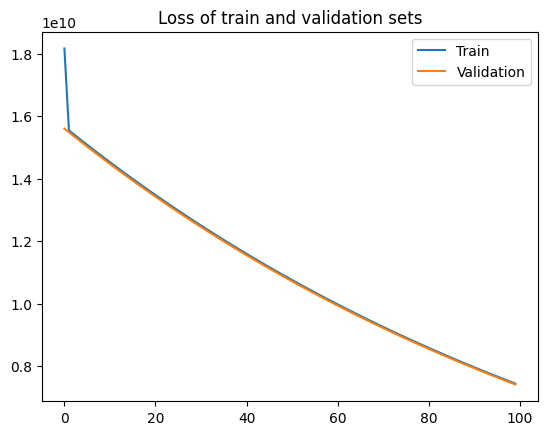

Training time: 44.76862812042236 seconds


In [27]:
# Set weight initializer
initial = tf.keras.initializers.RandomNormal(mean=10)

# Regularization param
for a in [0.1, 0.01, 0.001]:

    # Set regularizer
    reg = tf.keras.regularizers.L2(a)

    model_3 = Sequential([
        layers.Flatten(input_shape=(28 * 28, )),
        layers.Dense(n_hidden_1, activation='relu', kernel_initializer=initial, kernel_regularizer=reg),
        layers.Dense(n_hidden_2, activation='relu', kernel_initializer=initial, kernel_regularizer=reg),
        layers.Dense(10, kernel_initializer=initial, kernel_regularizer=reg)
    ])

    model_3.summary()

    # Set optimizer
    opt = optimizers.SGD(learning_rate=0.01)

    # Compile model
    model_3.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

    st = time.time()

    history = model_3.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

    end = time.time()

    # Plot the diagrams
    loss_acc_plot(history)

    print('Training time:', end-st, 'seconds')

### Without weight initialization

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 3s 10ms/step - loss: 31.1071 - accuracy: 0.4570 - val_loss: 21.4735 - val_accuracy: 0.6228
Epoch 2/100
188/188 [=============

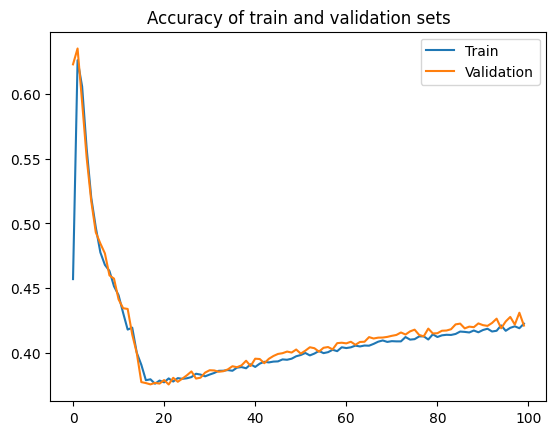

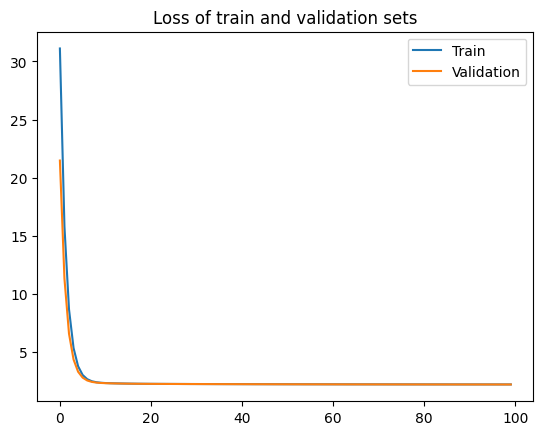

Training time: 141.15868854522705 seconds
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 4s 14ms/step - loss: 5.8042 - accuracy: 0.5239 - val_loss: 5.1846 - val_accuracy: 0

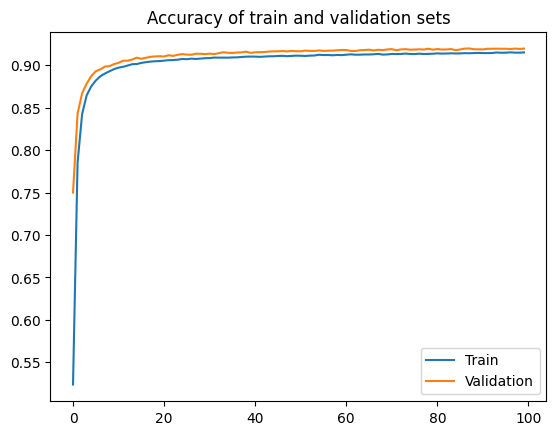

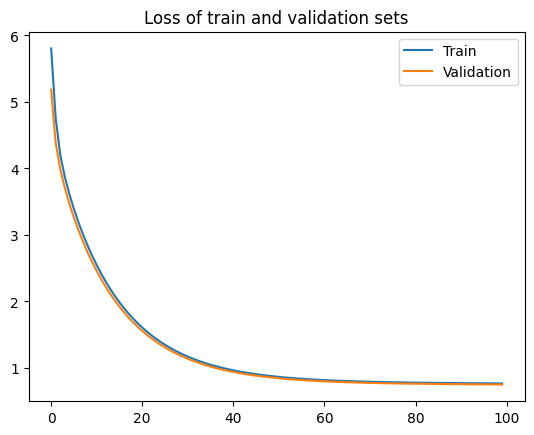

Training time: 104.66551470756531 seconds
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3548 - accuracy: 0.4848 - val_loss: 1.8949 - val_accuracy: 0.

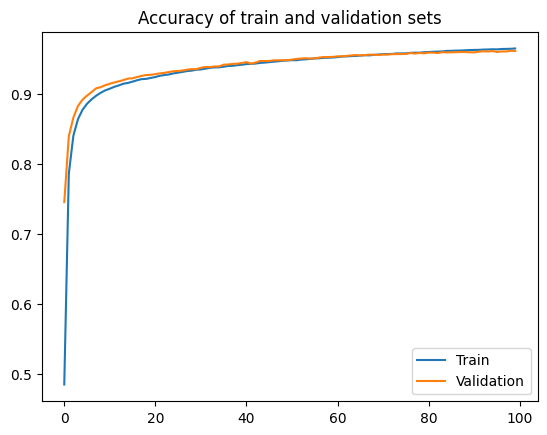

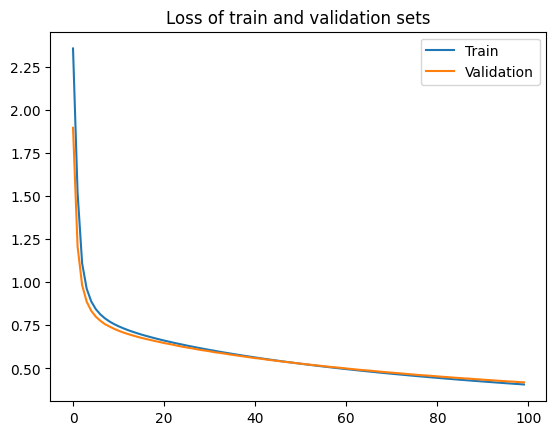

Training time: 77.56098222732544 seconds


In [6]:
# Regularization param
for a in [0.1, 0.01, 0.001]:

    # Set regularizer
    reg = tf.keras.regularizers.L2(a)

    model_3 = Sequential([
        layers.Flatten(input_shape=(28 * 28, )),
        layers.Dense(n_hidden_1, activation='relu', kernel_regularizer=reg),
        layers.Dense(n_hidden_2, activation='relu', kernel_regularizer=reg),
        layers.Dense(10, kernel_regularizer=reg)
    ])

    model_3.summary()

    # Set optimizer
    opt = optimizers.SGD(learning_rate=0.01)

    # Compile model
    model_3.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

    st = time.time()

    history = model_3.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

    end = time.time()

    # Plot the diagrams
    loss_acc_plot(history)

    print('Training time:', end-st, 'seconds')

## 5th Model with L1 regularization

### With weight initialization

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 128)               100480    
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 256)               33024     
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_47 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==========================

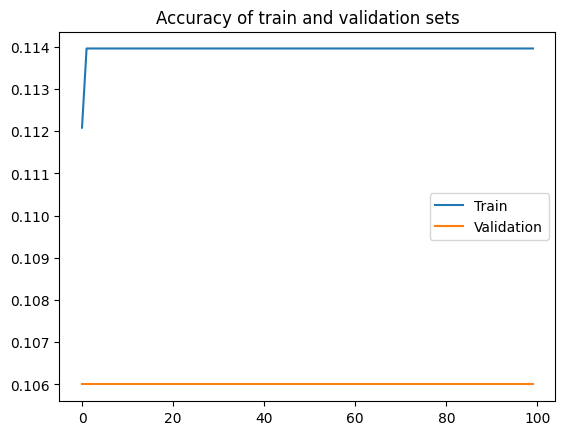

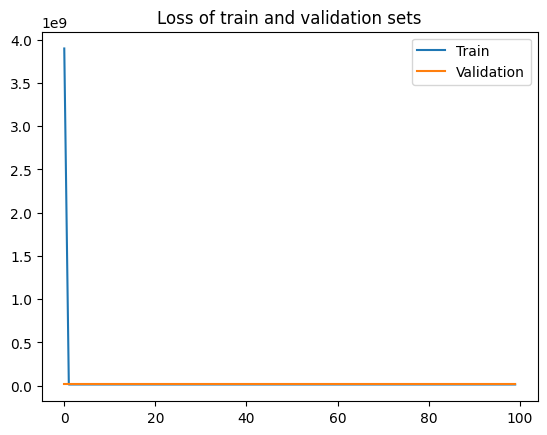

Training time: 140.5585663318634 seconds


In [17]:
# Set weight initializer
initial = tf.keras.initializers.RandomNormal(mean=10)

# Set regularizer
reg = tf.keras.regularizers.l1(0.01)

model_4 = Sequential([
    layers.Dense(n_hidden_1, input_shape=(28*28,), activation='relu', kernel_initializer=initial, kernel_regularizer=reg),
    layers.Dropout(0.3),
    layers.Dense(n_hidden_2, activation='relu', kernel_initializer=initial, kernel_regularizer=reg),
    layers.Dropout(0.3),
    layers.Dense(10, kernel_initializer=initial, kernel_regularizer=reg)
])

model_4.summary()

# Set optimizer
opt = optimizers.SGD(learning_rate=0.01)

# Compile model
model_4.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

st = time.time()

history = model_4.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')

### Without weight initialization

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               100480    
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 256)               33024     
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_56 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==========================

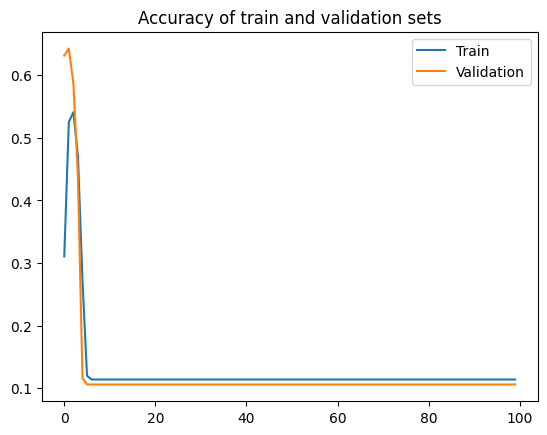

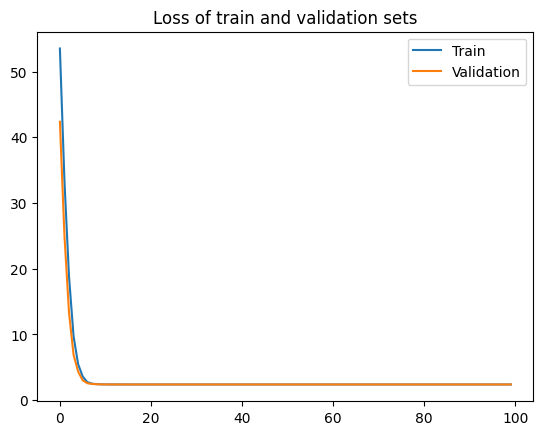

Training time: 155.9645712375641 seconds


In [20]:
# Set regularizer
reg = tf.keras.regularizers.L1(0.01)

model_4 = Sequential([
    layers.Dense(n_hidden_1, input_shape=(28*28,), activation='relu', kernel_regularizer=reg),
    layers.Dropout(0.3),
    layers.Dense(n_hidden_2, activation='relu',kernel_regularizer=reg),
    layers.Dropout(0.3),
    layers.Dense(10, kernel_regularizer=reg)
])

model_4.summary()

# Set optimizer
opt = optimizers.SGD(learning_rate=0.01)

# Compile model
model_4.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

st = time.time()

history = model_4.fit(x_train, y_train, batch_size=256, epochs=num_epochs, validation_split=0.2)

end = time.time()

# Plot the diagrams
loss_acc_plot(history)

print('Training time:', end-st, 'seconds')